# SpringBoard Capstone2: Coronavirus Tweets Sentiment Analysis

    Data from Kaggle.com: https://www.kaggle.com/datatattle/covid-19-nlp-text-classification/metadata
## Final Metrics Using test['Sentiment'] as y_test

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
# from wordcloud import WordCloud
import re
from sklearn.svm import LinearSVC

from sklearn import metrics
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [10]:
tweet = pd.read_csv('/Users/Ling/Desktop/01_Springboard/Corona_Tweet/Data/ProcessedTweets', index_col = 0)
tweet.fillna('', inplace=True)
tweet.head()
tweet.isna().any()

test = pd.read_csv('/Users/Ling/Desktop/01_Springboard/Corona_Tweet/Data/ProcessedTestData', index_col = 0)
test.fillna('', inplace=True)
test.head()
test.isna().any()

text         False
Sentiment    False
dtype: bool

In [11]:
from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.model_selection import train_test_split 

X_train = tweet['text'] 
y_train = tweet['Sentiment']

X_test = test['text']
y_test = test['Sentiment']

Count_vect = CountVectorizer(ngram_range=(1, 1), max_df=0.7, min_df=15)

Count_train = Count_vect.fit_transform(X_train)
Count_test = Count_vect.transform(X_test)

# Print the features
print('# of feature names', len(Count_vect.get_feature_names()))
print(Count_vect.get_feature_names()[100:200])

# of feature names 4948
['ai', 'aid', 'aim', 'aimed', 'ain', 'aint', 'air', 'airborne', 'airline', 'airlines', 'airport', 'aisle', 'aisles', 'aka', 'alah', 'alberta', 'alcohol', 'alcoholbased', 'aldi', 'alegedly', 'alergies', 'alert', 'aleviate', 'alive', 'almost', 'aloe', 'alone', 'alonetogether', 'along', 'alongside', 'alow', 'alowed', 'alowing', 'alows', 'already', 'also', 'alternative', 'alternatives', 'although', 'always', 'amazing', 'amazon', 'ambulance', 'america', 'american', 'americans', 'americas', 'amid', 'amidst', 'amo', 'among', 'amongst', 'amount', 'amounts', 'amp', 'ample', 'analysis', 'analyst', 'analysts', 'analytics', 'andor', 'andrew', 'angela', 'angeles', 'angry', 'animal', 'animals', 'another', 'anounce', 'anounced', 'anouncement', 'anouncements', 'anounces', 'anouncing', 'anoying', 'answer', 'answered', 'answers', 'anti', 'antibacterial', 'anticipate', 'anual', 'anxiety', 'anxious', 'anybody', 'anymore', 'anyone', 'anything', 'anytime', 'anyway', 'anywhere', 'ap',

In [21]:
## Use CountVecterizer and tuned parameters
from sklearn.svm import SVC
SVCCount = SVC(C=1, degree=0, gamma=1, kernel='linear')
SVCCount.fit(Count_train, y_train)
y_pred_Count = SVCCount.predict(Count_test)

                    precision    recall  f1-score   support

Extremely Negative       0.64      0.62      0.63       592
Extremely Positive       0.72      0.68      0.70       599
          Negative       0.59      0.60      0.60      1041
           Neutral       0.72      0.73      0.73       619
          Positive       0.62      0.65      0.64       947

          accuracy                           0.65      3798
         macro avg       0.66      0.65      0.66      3798
      weighted avg       0.65      0.65      0.65      3798

F1 accuracy:  0.64797261716693
Confusion Matrix [[365   3 187  14  23]
 [  5 405  27   6 156]
 [160  24 621  97 139]
 [ 14  10  84 454  57]
 [ 25 121 127  58 616]]


In [28]:
print(classification_report(y_test, y_pred_Count))
print('F1 accuracy: ', metrics.accuracy_score(y_test, y_pred_Count))
cm = metrics.confusion_matrix(y_test, y_pred_Count)
print('\n', 'Confusion Matrix', '\n', cm)
cm_n = metrics.confusion_matrix(y_test, y_pred_Count,normalize = 'true')
print('\n', 'Normalized Confusion Matrix', '\n', cm_n)

                    precision    recall  f1-score   support

Extremely Negative       0.64      0.62      0.63       592
Extremely Positive       0.72      0.68      0.70       599
          Negative       0.59      0.60      0.60      1041
           Neutral       0.72      0.73      0.73       619
          Positive       0.62      0.65      0.64       947

          accuracy                           0.65      3798
         macro avg       0.66      0.65      0.66      3798
      weighted avg       0.65      0.65      0.65      3798

F1 accuracy:  0.64797261716693

 Confusion Matrix 
 [[365   3 187  14  23]
 [  5 405  27   6 156]
 [160  24 621  97 139]
 [ 14  10  84 454  57]
 [ 25 121 127  58 616]]

 Normalized Confusion Matrix 
 [[0.61655405 0.00506757 0.31587838 0.02364865 0.03885135]
 [0.00834725 0.67612688 0.04507513 0.01001669 0.26043406]
 [0.15369837 0.02305476 0.59654179 0.09317963 0.13352546]
 [0.02261712 0.01615509 0.13570275 0.73344103 0.09208401]
 [0.02639916 0.12777191 0

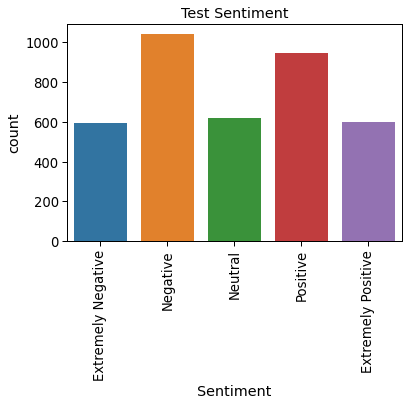

In [30]:
import matplotlib.pyplot as plt

from importlib import reload   ### Had to add these two steps 2021-12-17
plt=reload(plt)                ### Had to add these two steps 2021-12-17

sns.set_context("paper", font_scale=1.5)
order = ['Extremely Negative', 'Negative', 'Neutral','Positive','Extremely Positive']
sns.countplot(x = 'Sentiment', data = test, order = order)
plt.xticks(rotation = 90)
plt.title('Test Sentiment')
plt.show()

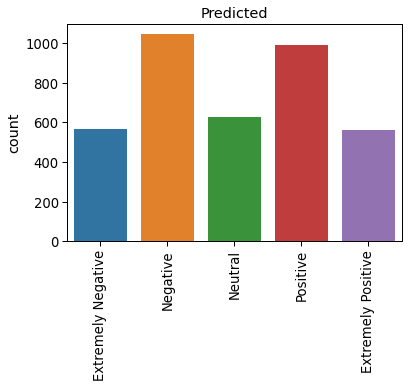

In [29]:
import matplotlib.pyplot as plt

# from importlib import reload   ### Had to add these two steps 2021-12-17
# plt=reload(plt)                ### Had to add these two steps 2021-12-17

sns.set_context("paper", font_scale=1.5)
order = ['Extremely Negative', 'Negative', 'Neutral','Positive','Extremely Positive']
sns.countplot(x = y_pred_Count, order = order)
plt.xticks(rotation = 90)
plt.title('Predicted')
plt.show()

## Predicted slightly more Neutral and positive compared to true labels.